---
title: 'surfinpy: A Surface Phase Diagram Generator'
tags:
- Chemistry
- Physics
- Density Functional Theory
- Solid State Chemistry
- Simulation
- materials
authors:
- name: Adam R. Symington
  orcid: 0000-0001-6059-497X
  affiliation: "1"
- name: Joshua Tse
  orcid: 0000-0002-1320-557X
  affiliation: 2
- name: Marco Molinari
  orcid: 0000-0001-7144-6075
  affiliation: 2
- name: Arnaud Marmier
  orcid: 0000-0003-3836-0004
  affiliation: 3
- name: Stephen C. Parker
  orcid: 0000-0003-3804-0975
  affiliation: 1
affiliations:
- name: Department of Chemistry, University of Bath
  index: 1
- name: Department of Chemistry, University of Huddersfield
  index: 2
- name: FET - Engineering, Design and Mathematics, University of the West of England
  index: 3
date: 25 January 2019
bibliography: paper.bib
---

# Summary

A surface phase diagram is a graphical representation of the different physical states of a surface under different conditions.
The surface represents the first point of contact between the material and the environment.
Thus, understanding the state of surface is crucial for a wide range of problems in materials science concerning the relationship between
the state of the surface and the surrounding environmental condtions.
Examples include particle morphologies in solid state batteries [@Canepa2018];
determining the concentration of adsorbed water at a surface depending on synthesis conditions [@Molinari2012] [@Tegner2017];
catalytic reactions [@Reuter2003]; or determing the effect of dopants and impurities on the surface stability.  

Computational modelling can be used to generate surface phase diagrams from energy minimisation data.
One common research question is how water adsorption affects the surface and material properties.
The conventional starting point is to perform a series of energy minimisation calculations with varying concentrations of water on several different slabs.
From the energies, the surface free energy of each calculation (phase) as a function of temperature and pressure can be calculated using a well-established approach [@Molinari2012].
Once the free energy is known under different constants, the phase which is most stable at a specific temperature and pressure, and thus a phase diagram, can be generated.

A further degree of complexity can be introduced by considering surface defects, e.g., vacancies or interstitials, or other adsorbants, e.g., carbon dioxide.
Using surface defects as an example, it is important to consider the relationship between the defective surface, the stoichiometric surface and the adsorbing water molecules.
A surface phase diagram can be constructed as a function of the chemcial potential of the adsorbing species (water) and the surface defect
(e.g., oxygen, if oxygen vacancies are being considered). This is done using the method of Marmier & Parker[-@Marmier2004].



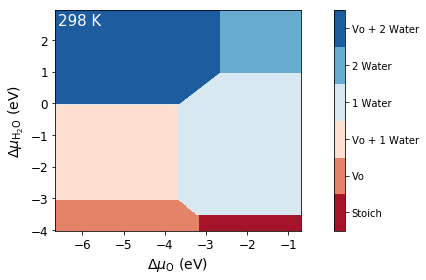

In [3]:

from surfinpy import mu_vs_mu

Oxygen_exp = mu_vs_mu.temperature_correction("examples/Notebooks/O2.txt", 298)
Water_exp = mu_vs_mu.temperature_correction("examples/Notebooks/H2O.txt", 298)

Oxygen_corrected = (-9.08 + -0.86 + Oxygen_exp) / 2
Water_corrected = -14.84 + 0.55 + Water_exp

bulk = {'Cation' : 1, 'Anion' : 2, 'Energy' : -780.0, 'F-Units' : 4}

pure =     {'Cation': 24, 'X': 48, 'Y': 0, 'Area': 60.0, 'Energy': -575.0,   'Label': 'Stoich',  'nSpecies': 1}
H2O =      {'Cation': 24, 'X': 48, 'Y': 2, 'Area': 60.0, 'Energy': -612.0,   'Label': '1 Water', 'nSpecies': 1}
H2O_2 =    {'Cation': 24, 'X': 48, 'Y': 4, 'Area': 60.0, 'Energy': -640.0,   'Label': '2 Water', 'nSpecies': 1}
H2O_3 =    {'Cation': 24, 'X': 48, 'Y': 8, 'Area': 60.0, 'Energy': -676.0,   'Label': '3 Water', 'nSpecies': 1}
Vo =       {'Cation': 24, 'X': 46, 'Y': 0, 'Area': 60.0, 'Energy': -558.0,   'Label': 'Vo', 'nSpecies': 1}
H2O_Vo =   {'Cation': 24, 'X': 46, 'Y': 2, 'Area': 60.0, 'Energy': -594.0,  'Label': 'Vo + 1 Water', 'nSpecies': 1}
H2O_Vo_2 = {'Cation': 24, 'X': 46, 'Y': 4, 'Area': 60.0, 'Energy': -624.0,  'Label': 'Vo + 2 Water', 'nSpecies': 1}
H2O_Vo_3 = {'Cation': 24, 'X': 46, 'Y': 6, 'Area': 60.0, 'Energy': -640.0, 'Label': 'Vo + 3 Water', 'nSpecies': 1}
H2O_Vo_4 = {'Cation': 24, 'X': 46, 'Y': 8, 'Area': 60.0, 'Energy': -670.0, 'Label': 'Vo + 4 Water', 'nSpecies': 1}

data = [pure, H2O_2, H2O_Vo, H2O,  H2O_Vo_2, H2O_3, H2O_Vo_3,  H2O_Vo_4, Vo]

deltaX = {'Range': [ -12, -6],  'Label': 'O'}
deltaY = {'Range': [ -19, -12], 'Label': 'H_2O'}

system =  mu_vs_mu.calculate(data, bulk, deltaX, deltaY, x_energy=Oxygen_corrected, y_energy=Water_corrected)

system.plot_phase(temperature=298, set_style="fast", colourmap="RdBu")




# `surfinpy`

`surfinpy` is a Python module for generating surface phase diagrams from DFT data.
It contains two core modules for generating surface phase diagrams using both the methods employed in @Molinari2012 and @Marmier2004.
These allow fast generation of temperature vs. pressure phase diagrams and phase diagrams as a function of chemcial potential of species A and B.
The plotting classes take the outputs of the calculation modules and generate phase diagrams using `matplotlib`.
`surfinpy` is aimed towards theoretical solid state physicist who have a basic familiarity with Python.
The repository contains examples of the core functionality as well as tutorials, implemented in Jupyter notebooks to explain the full theory.
Furthermore, a detailed description of theory is also available within the documentation.

# Acknowledgements

ARS would like to thank Andrew R. McCluskey for his guidance through this project. This package was written during a PhD funded by AWE and EPSRC (EP/R010366/1). The input
data for the development and testing of this project was generated using ARCHER UK National Supercomputing Service (http://www.archer.ac.uk) via our membership of
the UK's HEC Ma-terials Chemistry Consortium funded by EPSRC (EP/L000202).

# References
